In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold

#NLP
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import regex as re
from nltk.corpus import stopwords # Import the stop word list
from sklearn.metrics import confusion_matrix

# PCA
from sklearn.decomposition import PCA 


import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./combined_df.csv', lineterminator='\n')

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

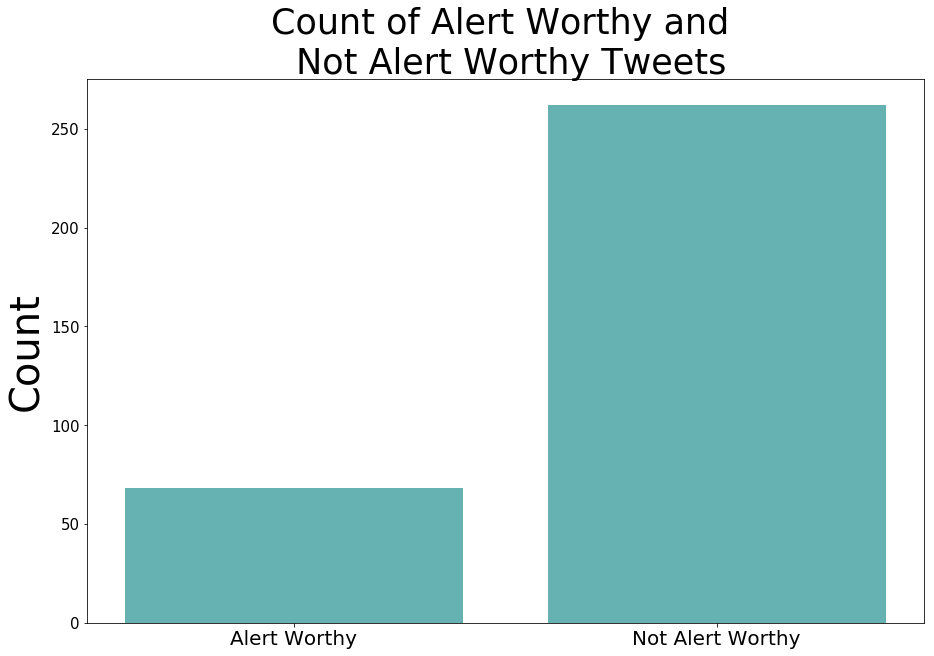

In [27]:
plt.figure(figsize = (15, 10))

plt.bar(['Alert Worthy', 'Not Alert Worthy'], [68, 262], color = 'teal', alpha = .6)

plt.title(label = 'Count of Alert Worthy and \n Not Alert Worthy Tweets', 
          fontsize = 35)
plt.ylabel('Count', fontsize = 40)
plt.xticks(['Alert Worthy', 'Not Alert Worthy'], fontsize = 20)
plt.yticks(fontsize = 15)

In [7]:
df[df.tsunami == 1].sum()

tsunami                                                   68
tweet      So did we have a hurricane tornado tsunami? So...
dtype: object

In [9]:
df.tsunami.value_counts()

0    282
1     68
Name: tsunami, dtype: int64

In [38]:
models = ['Logistic \n Regression', 'Decision Tree \n Classifier', 'Bagging \n Classifier', 'Random Forest \n Classifier', 'AdaBoost \n Classifier']

In [49]:
f1_initial_scores = [0.492605, 0.417899, 0.16583, 0.20696, 0.375]
f1_k_17 = [0.826195, 0.856884, 0.854783, 0.869817, 0.864878]
f1_k_4 = [0.827008, 0.843405, 0.8981, 0.865228, 0.891041]
f1_k_3 = [0.836859, 0.832688, 0.885361, 0.890842, 0.89035]
no_pca = [0.830429, 0.803205, 0.83517, 0.806282, 0.822909]
final_bag = 0.708738
final_ada = 0.69902913
final = 0.84000000

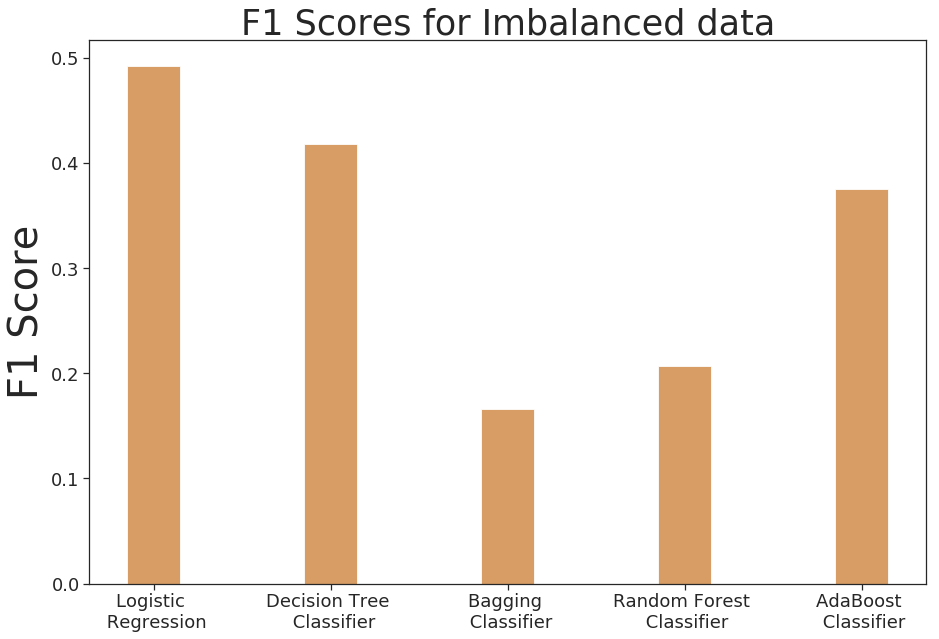

In [55]:
plt.figure(figsize = (15, 10))
plt.bar(models, f1_initial_scores, color="peru", alpha = .8, width=0.3)
sns.set_style("whitegrid") #Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":15,
"ytick.major.size":15})
sns.axes_style("whitegrid")

plt.title(label = 'F1 Scores for Imbalanced data', 
          fontsize = 35)
plt.ylabel('F1 Score', fontsize = 40)
plt.xlabel('')
#plt.xticks('Not Alert Worthy', 'Alert Worthy')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./F1_imbalanced.png');

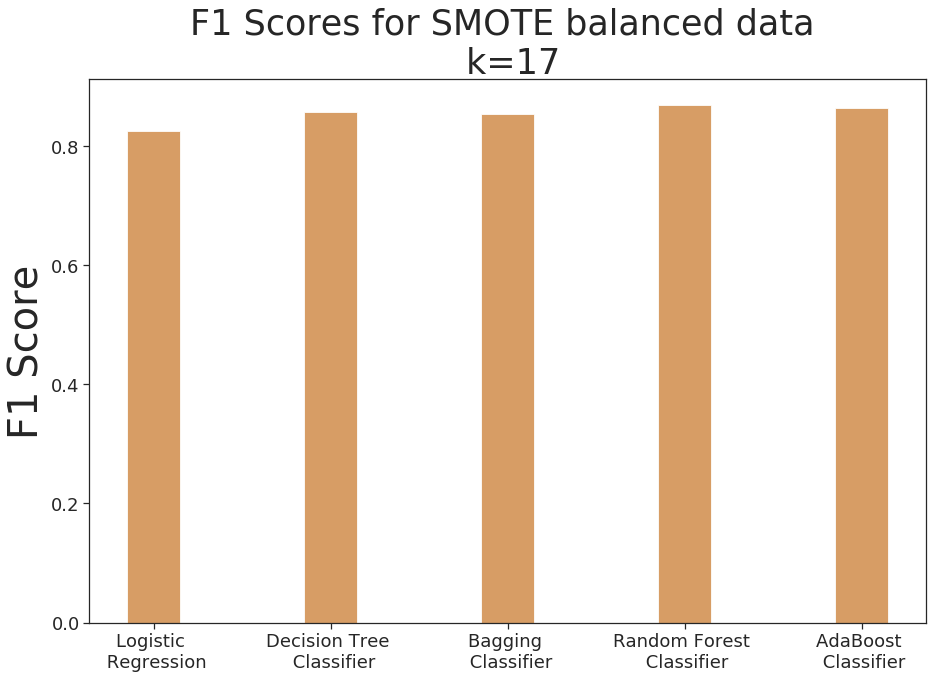

In [56]:
#SMote k = 17
plt.figure(figsize = (15, 10))
plt.bar(models, f1_k_17, color="peru", alpha = .8, width=0.3)
sns.set_style("whitegrid") #Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":15,
"ytick.major.size":15})
sns.axes_style("whitegrid")

plt.title(label = 'F1 Scores for SMOTE balanced data \n k=17', 
          fontsize = 35)
plt.ylabel('F1 Score', fontsize = 40)
plt.xlabel('')
#plt.xticks('Not Alert Worthy', 'Alert Worthy')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./F1_17.png');

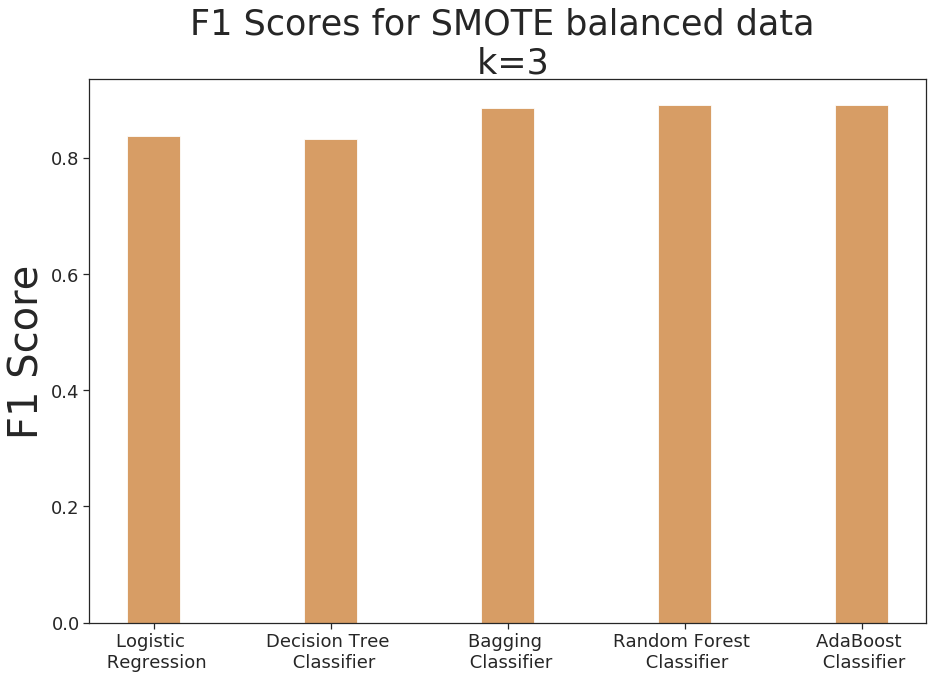

In [57]:
#SMote k = 3
plt.figure(figsize = (15, 10))
plt.bar(models, f1_k_3, color="peru", alpha = .8, width = 0.3)
sns.set_style("whitegrid") #Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":15,
"ytick.major.size":15})
sns.axes_style("whitegrid")

plt.title(label = 'F1 Scores for SMOTE balanced data \n k=3', 
          fontsize = 35)
plt.ylabel('F1 Score', fontsize = 40)
plt.xlabel('')
#plt.xticks('Not Alert Worthy', 'Alert Worthy')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./F1_3.png');


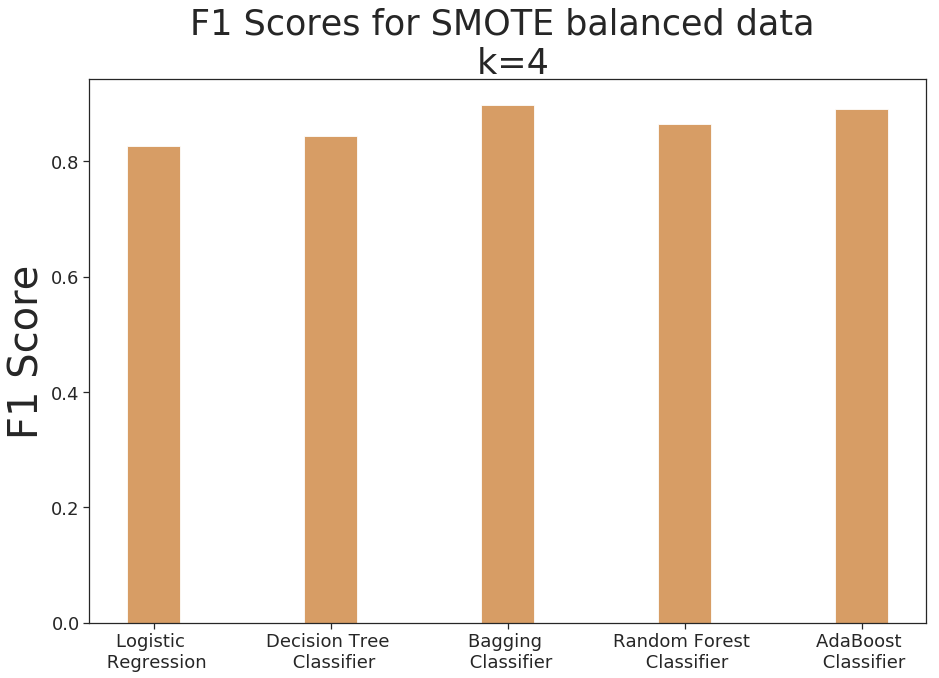

In [58]:
#SMote k = 4
plt.figure(figsize = (15, 10))
plt.bar(models, f1_k_4, color="peru", alpha = .8, width = 0.3)
sns.set_style("whitegrid") #Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":15,
"ytick.major.size":15})
sns.axes_style("whitegrid")

plt.title(label = 'F1 Scores for SMOTE balanced data \n k=4', 
          fontsize = 35)
plt.ylabel('F1 Score', fontsize = 40)
plt.xlabel('')
#plt.xticks('Not Alert Worthy', 'Alert Worthy')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./F1_4.png');

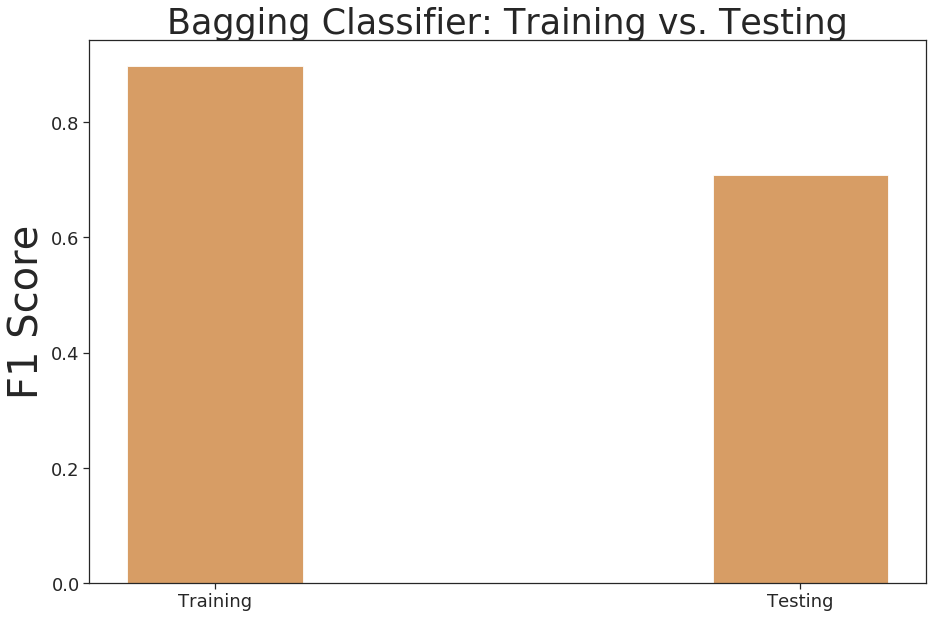

In [59]:
#Compare Train to Test
#Bagging 
plt.figure(figsize = (15, 10))
plt.bar(['Training', 'Testing'], [0.8981, 0.708737], color="peru", alpha = .8, width=0.3)
sns.set_style("whitegrid") #Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":15,
"ytick.major.size":15})
sns.axes_style("whitegrid")

plt.title(label = 'Bagging Classifier: Training vs. Testing', 
          fontsize = 35)
plt.ylabel('F1 Score', fontsize = 40)
plt.xlabel('')
#plt.xticks('Not Alert Worthy', 'Alert Worthy')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./bag_train_test.png');

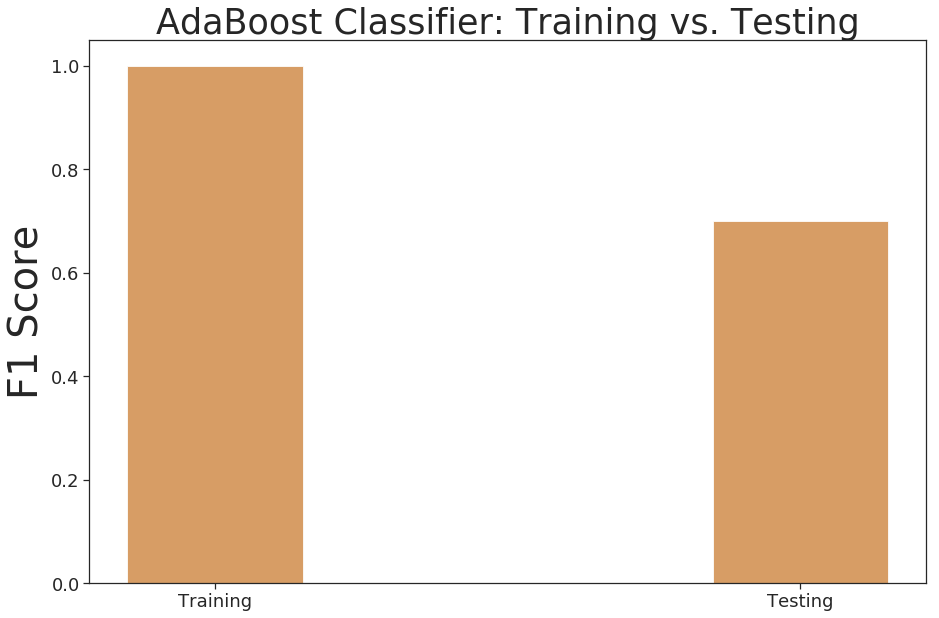

In [68]:
#Compare Train to Test
#ADA
plt.figure(figsize = (15, 10))
plt.bar(['Training', 'Testing'], [1, 0.69902013], color="peru", alpha = .8, width = .3)
sns.set_style("whitegrid") #Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":15,
"ytick.major.size":15})
sns.axes_style("whitegrid")

plt.title(label = 'AdaBoost Classifier: Training vs. Testing', 
          fontsize = 35)
plt.ylabel('F1 Score', fontsize = 40)
plt.xlabel('')
#plt.xticks('Not Alert Worthy', 'Alert Worthy')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./ada_train_test.png');

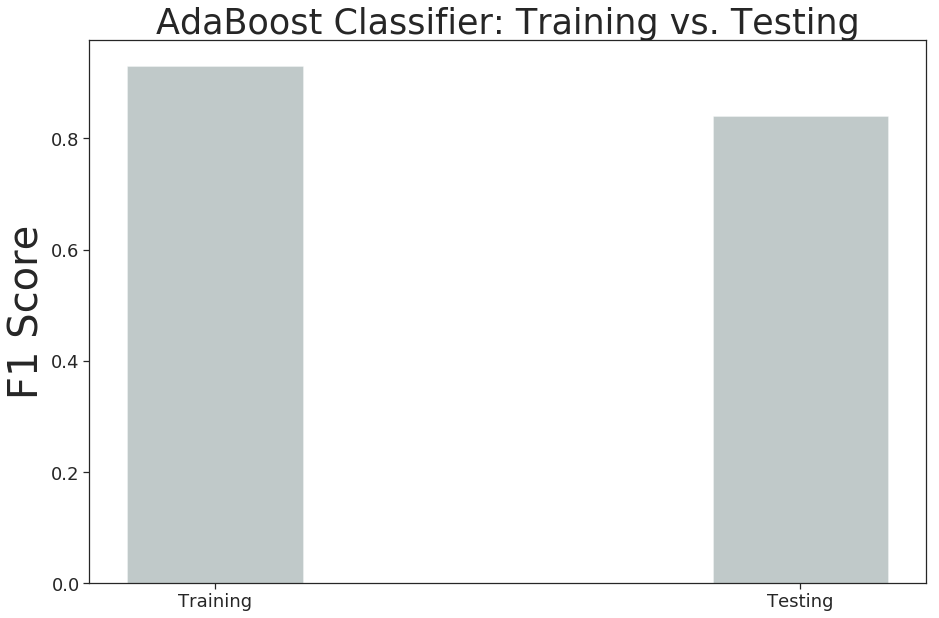

In [67]:
#Compare Train to Test
#No PCA ADA 
plt.figure(figsize = (15, 10))
plt.bar(['Training', 'Testing'], [0.931, 0.84], color="darkslategrey", alpha = .3, width = 0.3)
sns.set_style("whitegrid") #Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":15,
"ytick.major.size":15})
sns.axes_style("whitegrid")

plt.title(label = 'AdaBoost Classifier: Training vs. Testing', 
          fontsize = 35)
plt.ylabel('F1 Score', fontsize = 40)
plt.xlabel('')
#plt.xticks('Not Alert Worthy', 'Alert Worthy')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./final_train_test.png');